In [128]:
import pandas as pd
import numpy as np 
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso,LassoCV, ElasticNet, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from sklearn.feature_selection import RFE

from cycler import cycler


%matplotlib inline  

In [129]:
df=pd.read_csv('car_price_prediction.csv')

In [130]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [131]:
# удаление дубликатов
df=df.drop_duplicates()

In [132]:
df=df.drop(columns=['ID','Levy','Model','Color','Manufacturer'])

# Распределение категориальных признаков 

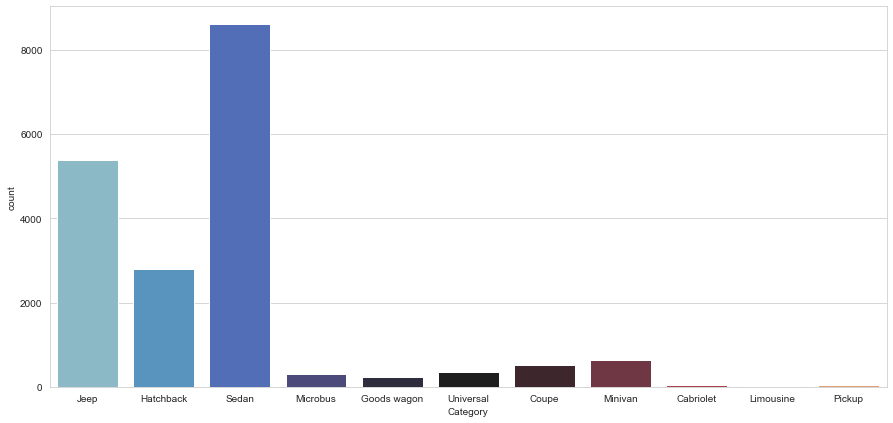

In [133]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(data=df,x='Category',palette='icefire')

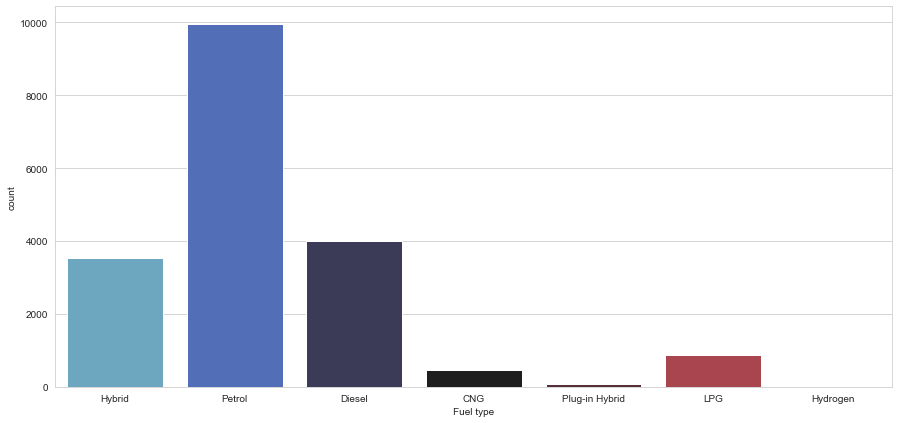

In [134]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(data=df,x='Fuel type',palette='icefire')

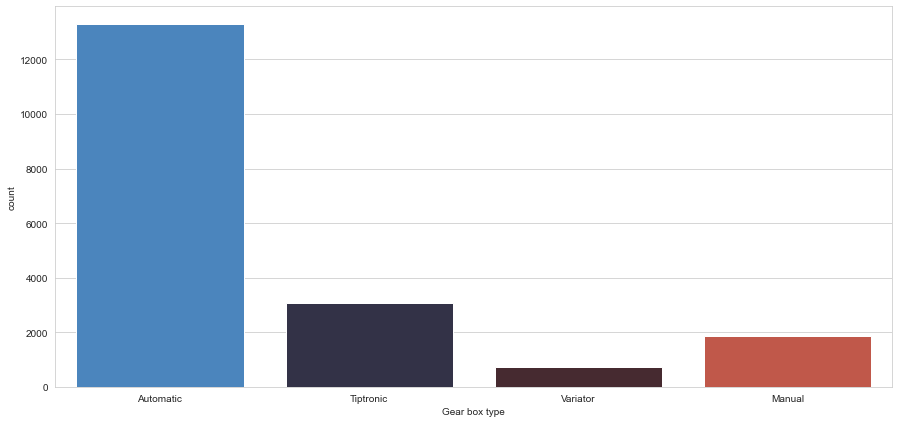

In [135]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(data=df,x='Gear box type',palette='icefire')

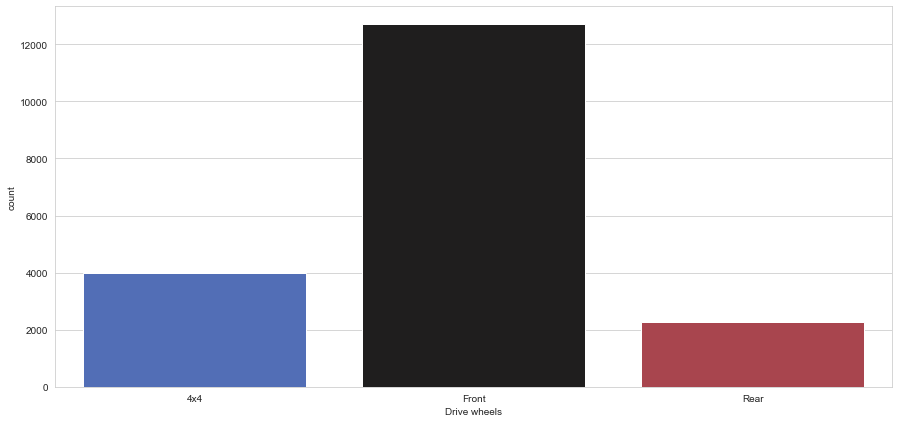

In [136]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(data=df,x='Drive wheels',palette='icefire')

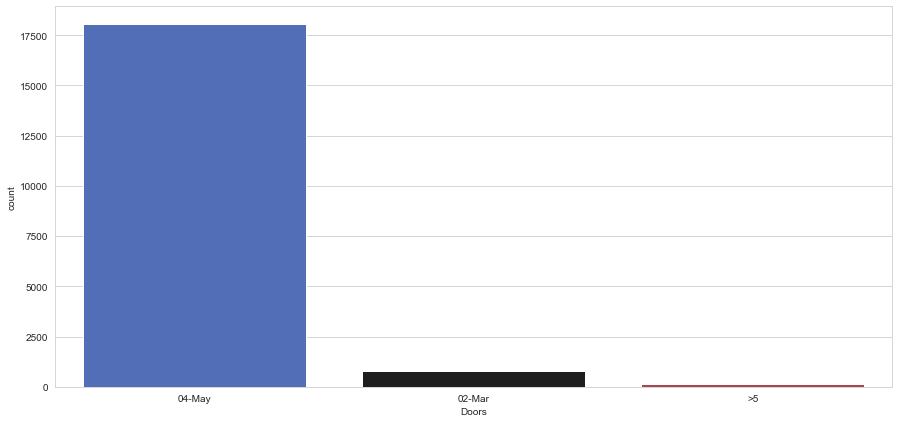

In [137]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(data=df,x='Doors',palette='icefire')

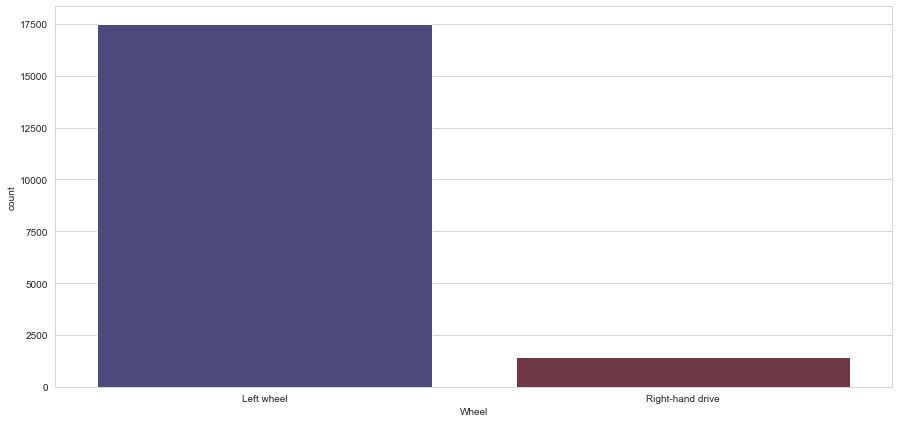

In [138]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(data=df,x='Wheel',palette='icefire')

In [139]:
le=LabelEncoder()
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

le=LabelEncoder()
le.fit(df['Leather interior'])
df['Leather interior']=le.transform(df['Leather interior'])

le=LabelEncoder()
le.fit(df['Fuel type'])
df['Fuel type']=le.transform(df['Fuel type'])

le=LabelEncoder()
le.fit(df['Gear box type'])
df['Gear box type']=le.transform(df['Gear box type'])

le=LabelEncoder()
le.fit(df['Drive wheels'])
df['Drive wheels']=le.transform(df['Drive wheels'])

le=LabelEncoder()
le.fit(df['Wheel'])
df['Wheel']=le.transform(df['Wheel'])

#выделение чисел в строковых данных
df['Mileage']=pd.to_numeric(df['Mileage'].str.split(' ',expand=True)[0])
df['Doors']=pd.to_numeric(df['Doors'].str.split('-',expand=True)[0].apply(lambda x:x[1]))
df['Engine volume']=pd.to_numeric(df['Engine volume'].str.split(' ',expand=True)[0])

#удаление выбросов по цене
q1=df.Price.quantile(0.25)
q3=df.Price.quantile(0.75)
df=df[(df.Price<(q3 + 1.5 * (q3-q1)))&((df.Price>(q1 - 1.5 * (q3-q1))))]

#удаление выбросов по пробегу автомобилей
q1=df.Mileage.quantile(0.25)
q3=df.Mileage.quantile(0.75)
df=df[(df.Mileage<(q3 + 1.5 * (q3-q1)))&((df.Mileage>(q1 - 1.5 * (q3-q1))))]

# Распределение числовых прихнаков

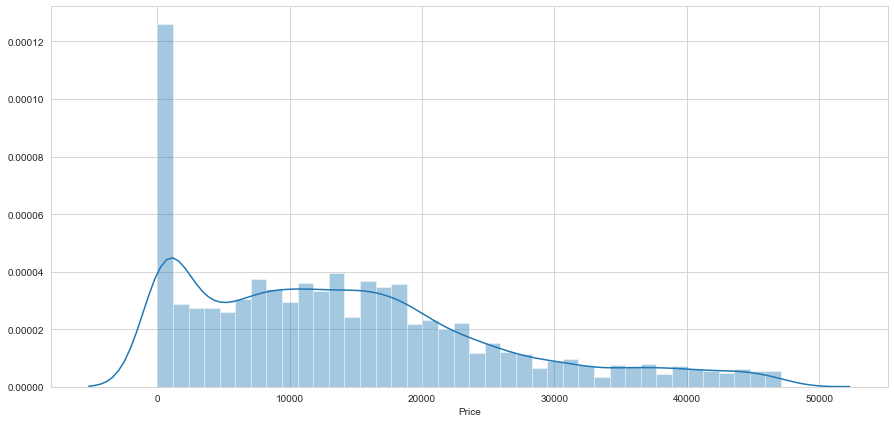

In [140]:
sns.set_style('whitegrid')
fig,ag=plt.subplots(figsize=(15,7))
sns.distplot(df['Price'])

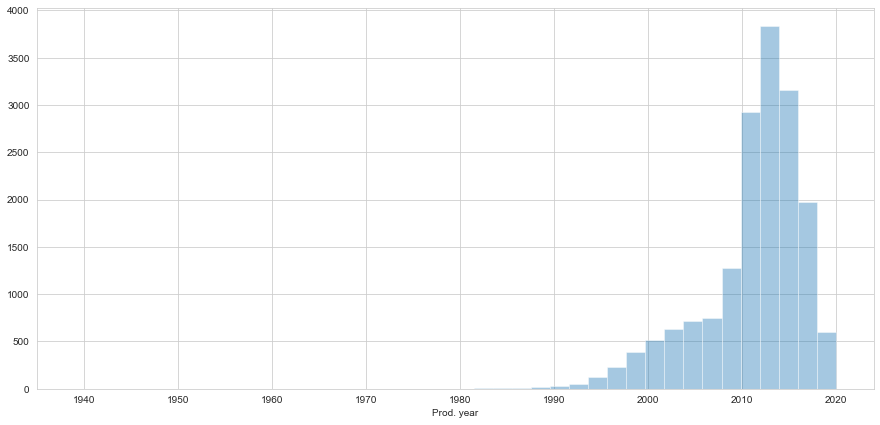

In [141]:
fig,ag=plt.subplots(figsize=(15,7))
sns.distplot(df['Prod. year'],kde=False,bins=40)

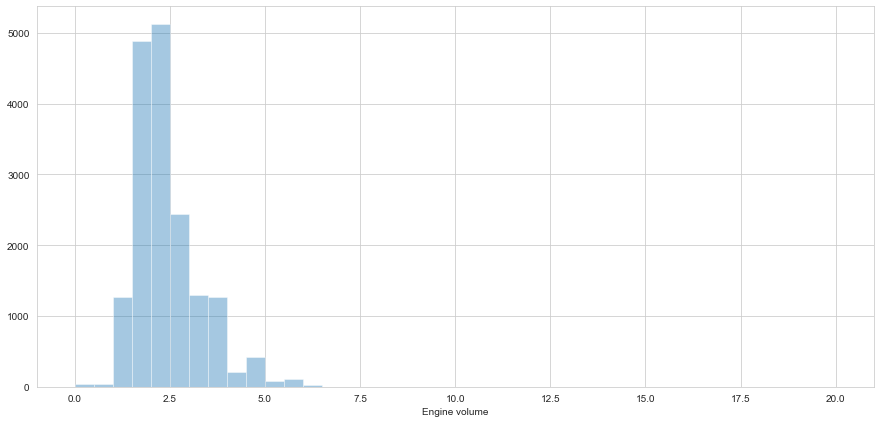

In [142]:
fig,ag=plt.subplots(figsize=(15,7))
sns.distplot(df['Engine volume'],kde=False,bins=40)

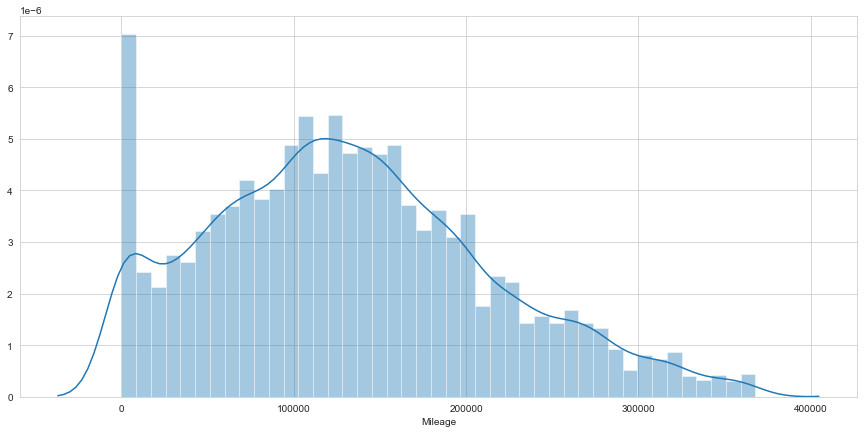

In [143]:
fig,ag=plt.subplots(figsize=(15,7))
sns.distplot(df['Mileage'])

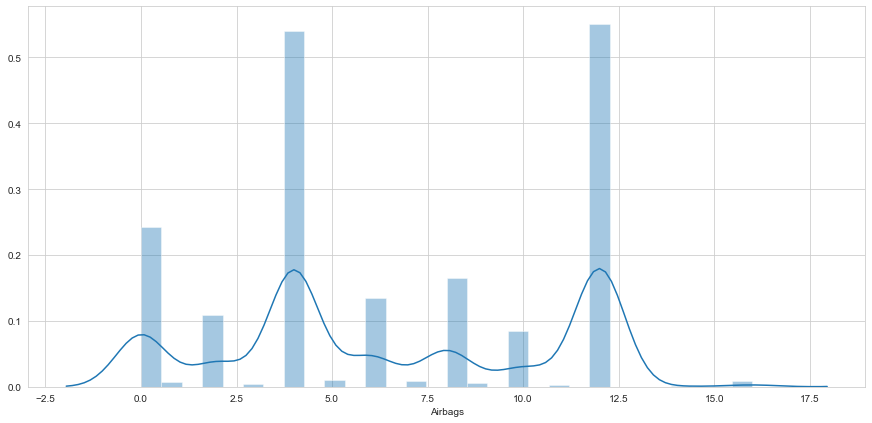

In [144]:
fig,ax=plt.subplots(figsize=(15,7))
sns.distplot(df['Airbags'],bins=30)

# Тепловая матрица корреляции

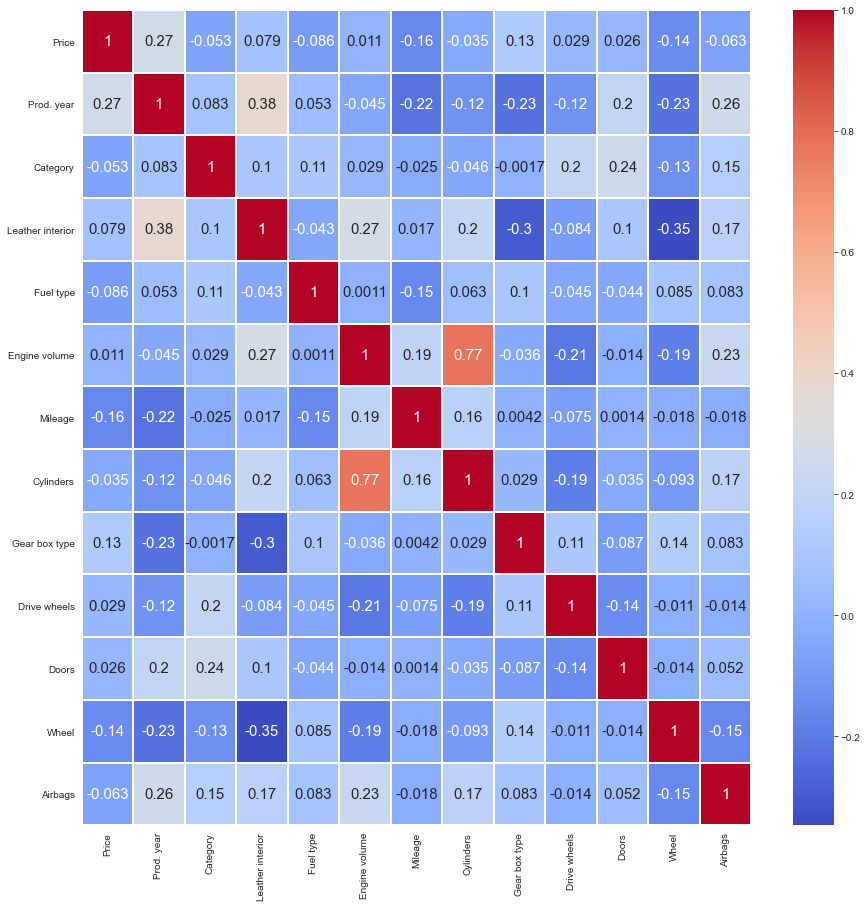

In [145]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linewidths=1,annot_kws={'size': 15})

In [146]:
df

,Price,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags
0,13328,2010,4,1,2,3.5,186005,6.0,0,0,4,0,12
1,16621,2011,4,0,5,3.0,192000,6.0,2,0,4,0,8
2,8467,2006,3,0,5,1.3,200000,4.0,3,1,4,1,2
3,3607,2011,4,1,2,2.5,168966,4.0,0,0,4,0,0
4,11726,2014,3,1,5,1.3,91901,4.0,0,1,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,1999,1,1,0,2.0,300000,4.0,1,2,2,0,5
19233,15681,2011,9,1,5,2.4,161600,4.0,2,1,4,0,8
19234,26108,2010,4,1,1,2.0,116365,4.0,0,1,4,0,4
19235,5331,2007,4,1,1,2.0,51258,4.0,0,1,4,0,4


In [147]:
X=df.iloc()[:,1:]
Y=df.iloc()[:,0]

In [148]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.7,random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [149]:
def print_plot():
    f, ax = plt.subplots(figsize=(14, 10))
    sns.regplot(x=Y_test,
                y=y_pred,
                scatter_kws={'s': 20},
                line_kws={"color": "red"});

LinearRegression 
r2_score : 0.18584 
MAE : 8132.76956 
MSE : 107616790.08621


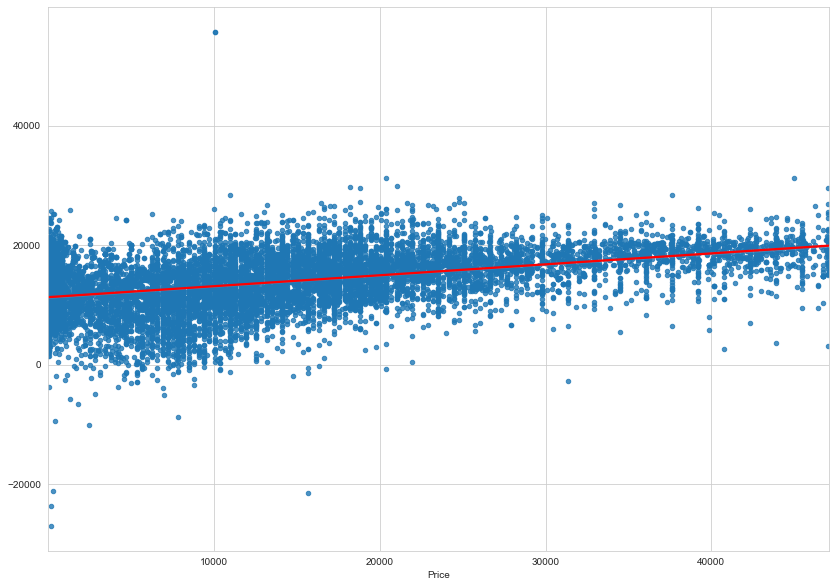

In [150]:
lm = LinearRegression()
lm.fit(X_train_scaled,Y_train)
y_pred = lm.predict(X_test_scaled)
print('LinearRegression \nr2_score : {:.5f} \nMAE : {:.5f} \nMSE : {:.5f}'.format(r2_score(Y_test,y_pred),mean_absolute_error(Y_test,y_pred),mean_squared_error(Y_test,y_pred)))
print_plot()

In [152]:
df.describe()

,Price,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags
count,17242.000000,17242.000000,17242.000000,17242.000000,17242.000000,17242.000000,17242.000000,17242.000000,17242.000000,17242.000000,17242.000000,17242.000000,17242.000000
mean,14237.669238,2010.684491,6.283494,0.709836,3.430171,2.277903,132587.621564,4.551618,0.536423,0.915961,3.923501,0.083111,6.585779
std,11473.686003,5.573401,2.798890,0.453851,1.809955,0.863696,81578.310083,1.163123,0.899627,0.560334,0.407580,0.276058,4.332329
min,1.000000,1939.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,4861.000000,2009.000000,4.000000,0.000000,2.000000,1.700000,71904.000000,4.000000,0.000000,1.000000,4.000000,0.000000,4.000000
50%,12544.000000,2012.000000,7.000000,1.000000,5.000000,2.000000,126708.500000,4.000000,0.000000,1.000000,4.000000,0.000000,6.000000
75%,20385.000000,2014.000000,9.000000,1.000000,5.000000,2.500000,184000.000000,4.000000,1.000000,1.000000,4.000000,0.000000,12.000000
max,47120.000000,2020.000000,10.000000,1.000000,6.000000,20.000000,367783.000000,16.000000,3.000000,2.000000,5.000000,1.000000,16.000000


In [151]:
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth = 5)
rf  = RandomForestRegressor(n_estimators=100, max_features= 7)
ada = AdaBoostRegressor( n_estimators=150, learning_rate =.08)
gbr = GradientBoostingRegressor(max_depth=7, n_estimators=500, learning_rate =.05)
xgb = XGBRegressor(max_depth = 7, n_estimators=500, learning_rate =.05)
cb  = CatBoostRegressor(learning_rate =.07, max_depth =7, verbose=0)

regressors = [('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr),('XGBRegressor', xgb),('CatBoostRegressor', cb)]

K Nearest Neighbours
    r2_score : 0.52695 
    MAE : 5404.54602 
    MSE : 62528050.76040


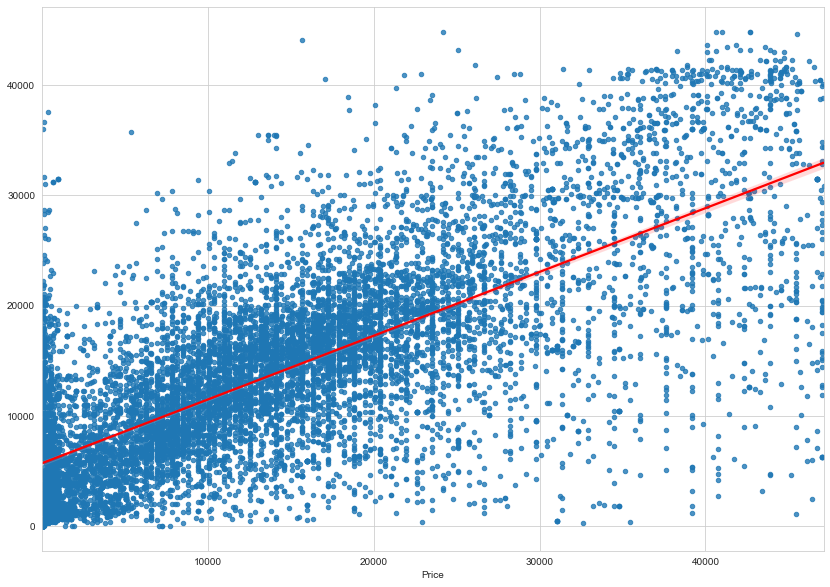

Decision Tree
    r2_score : 0.44868 
    MAE : 6209.80598 
    MSE : 72874230.30271


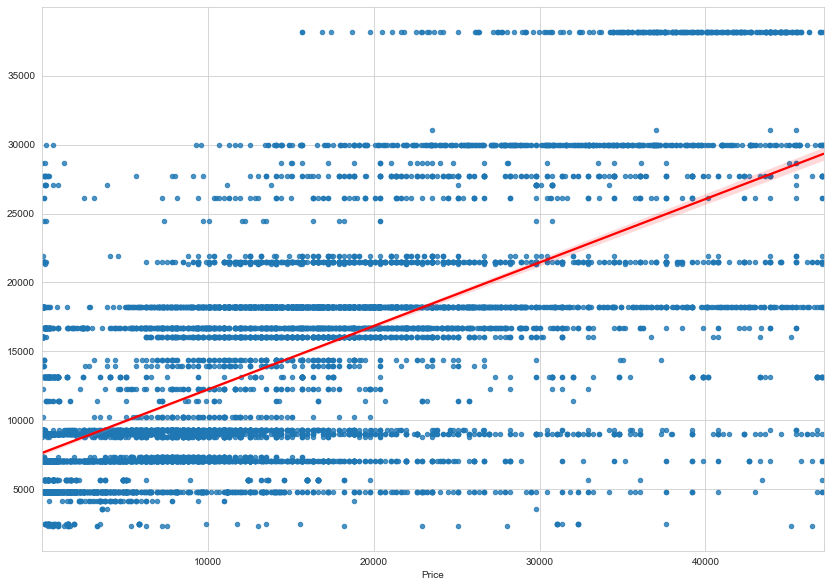

Random Forest
    r2_score : 0.67628 
    MAE : 4164.61689 
    MSE : 42789954.08268


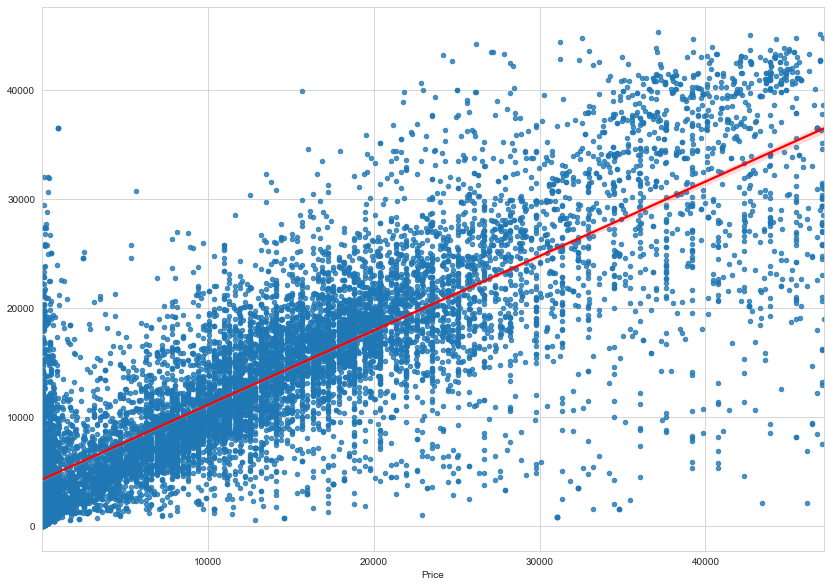

AdaBoost
    r2_score : 0.37460 
    MAE : 7199.07130 
    MSE : 82665827.88241


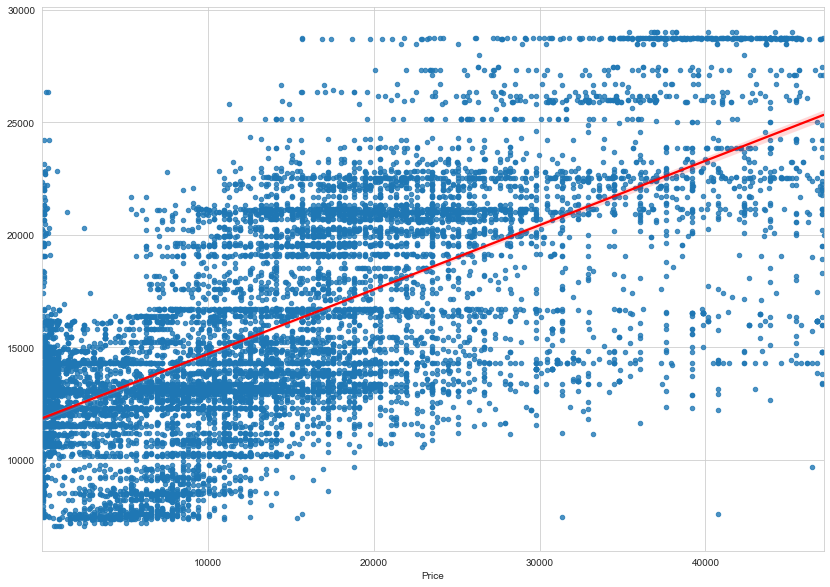

Gradient Boosting Regressor
    r2_score : 0.66097 
    MAE : 4358.74528 
    MSE : 44814120.34325


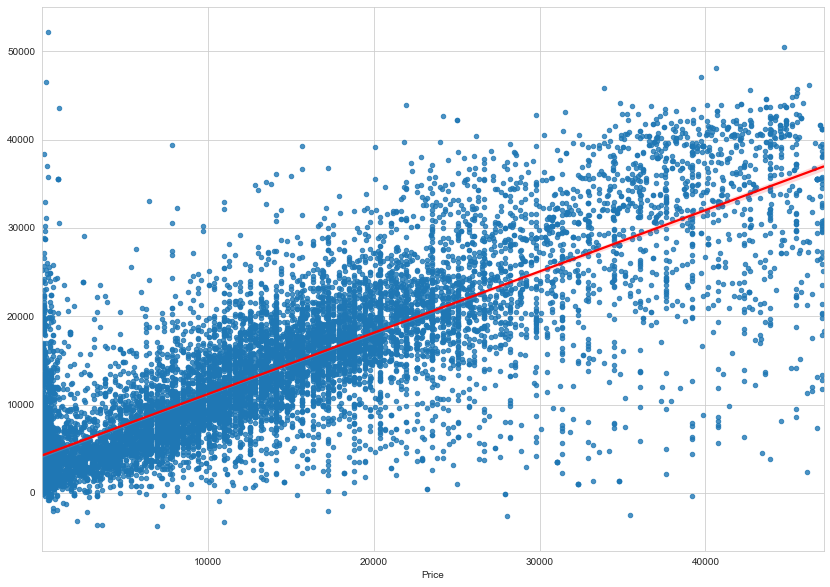

XGBRegressor
    r2_score : 0.66311 
    MAE : 4362.70563 
    MSE : 44531065.04919


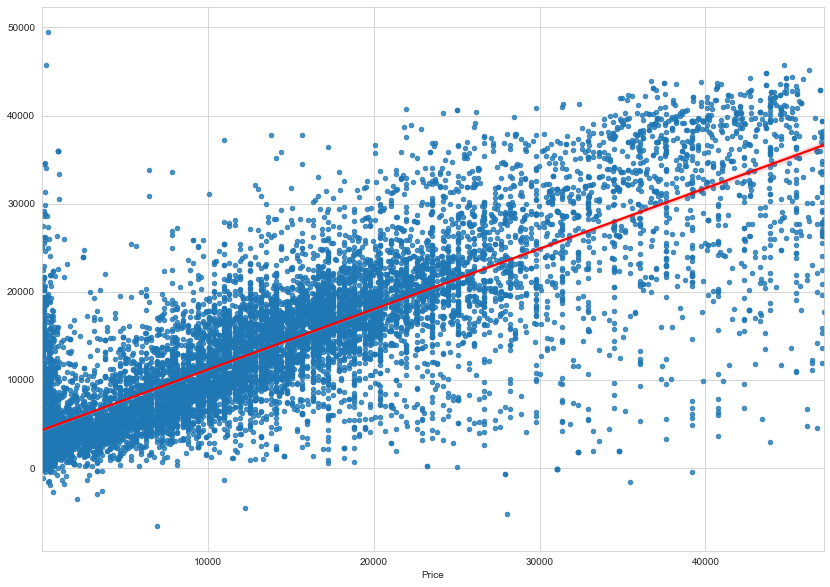

CatBoostRegressor
    r2_score : 0.66769 
    MAE : 4409.02457 
    MSE : 43925456.33816


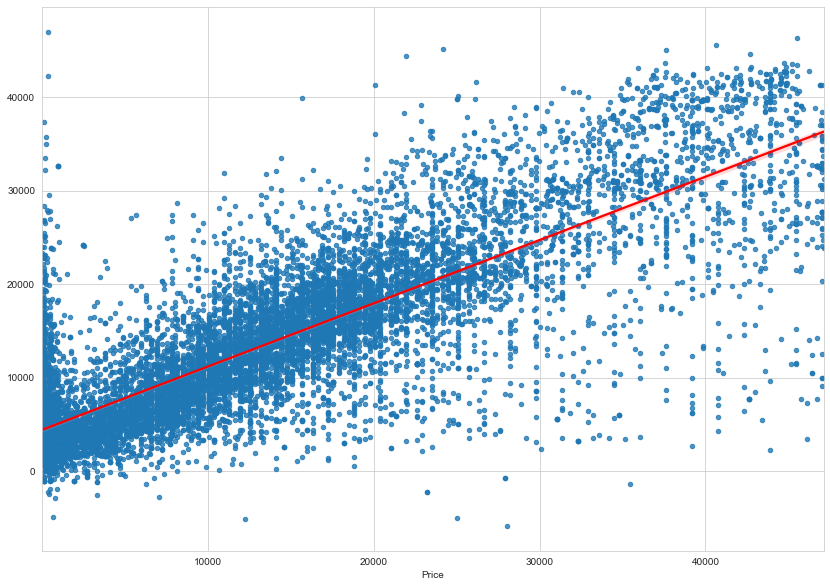

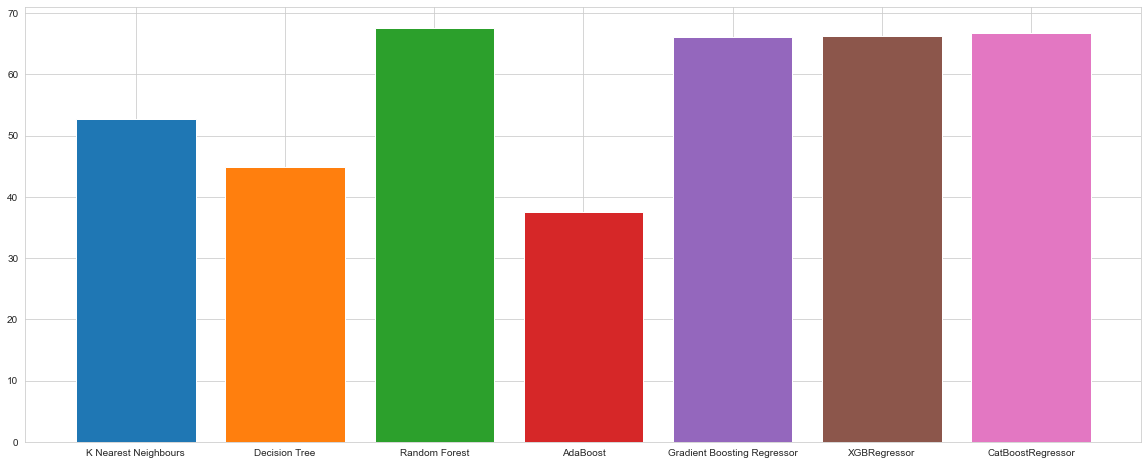

In [153]:
r2_scores = []
for regressor_name, regressor in regressors:

    regressor.fit(X_train_scaled, Y_train)    
  
    y_pred = regressor.predict(X_test_scaled)
    
    print('{:s}\n    r2_score : {:.5f} \n    MAE : {:.5f} \n    MSE : {:.5f}'.format(regressor_name,
                                                                                     r2_score(Y_test,y_pred),
                                                                                     mean_absolute_error(Y_test,y_pred),
                                                                                     mean_squared_error(Y_test,y_pred)))
    
    f, ax = plt.subplots(figsize=(14, 10))
    sns.regplot(x=Y_test,
                y=y_pred,
                scatter_kws={'s': 20},
                line_kws={"color": "red"});
    plt.show()
    r2_scores.append(r2_score(Y_test,y_pred)*100)

i=0
for regressor_name,regressor in regressors:
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name, r2_scores[i])
    i+=1    
    

In [154]:
r2_scores

[52.69533069262662,
 44.86808202755847,
 67.62789495365529,
 37.46039412003908,
 66.0965419942224,
 66.3106832783074,
 66.76884756548502]

In [155]:
RF_params={ 
            "n_estimators"      : [100,150,200],
            "max_features"      : [7,8,9],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False]
            }
RF=GridSearchCV(RandomForestRegressor(),refit=True,param_grid=RF_params, cv=5)
RF=RF.fit(X_train_scaled,Y_train)

In [156]:
RF.best_params_

{'bootstrap': True,
 'max_features': 7,
 'min_samples_split': 4,
 'n_estimators': 200}

CatBoostRegressor
    r2_score : 0.67607 
    MAE : 4215.41805 
    MSE : 42818001.04700


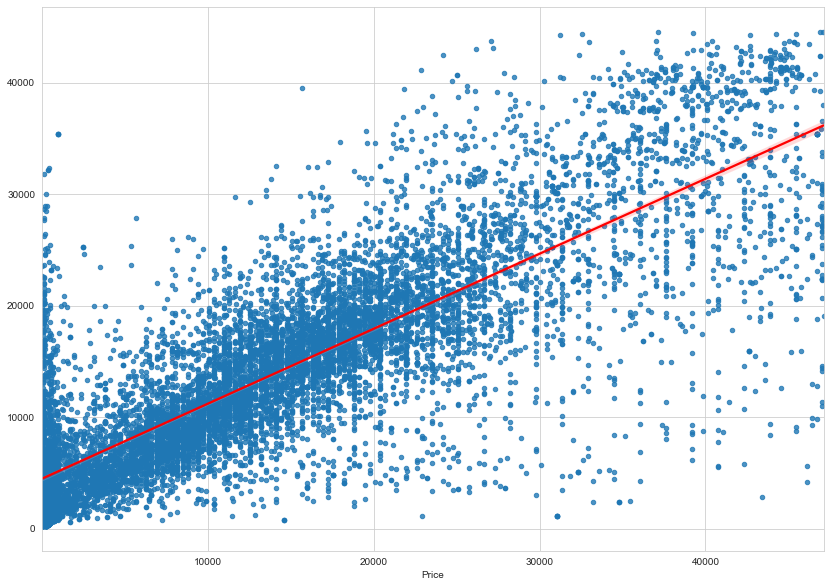

In [157]:
y_pred = RF.predict(X_test_scaled)
    
print('{:s}\n    r2_score : {:.5f} \n    MAE : {:.5f} \n    MSE : {:.5f}'.format(regressor_name,r2_score(Y_test,y_pred),mean_absolute_error(Y_test,y_pred),mean_squared_error(Y_test,y_pred)))
f, ax = plt.subplots(figsize=(14, 10))
sns.regplot(x=Y_test,
                y=y_pred,
                scatter_kws={'s': 20},
                line_kws={"color": "red"});
plt.show()

# Lasso

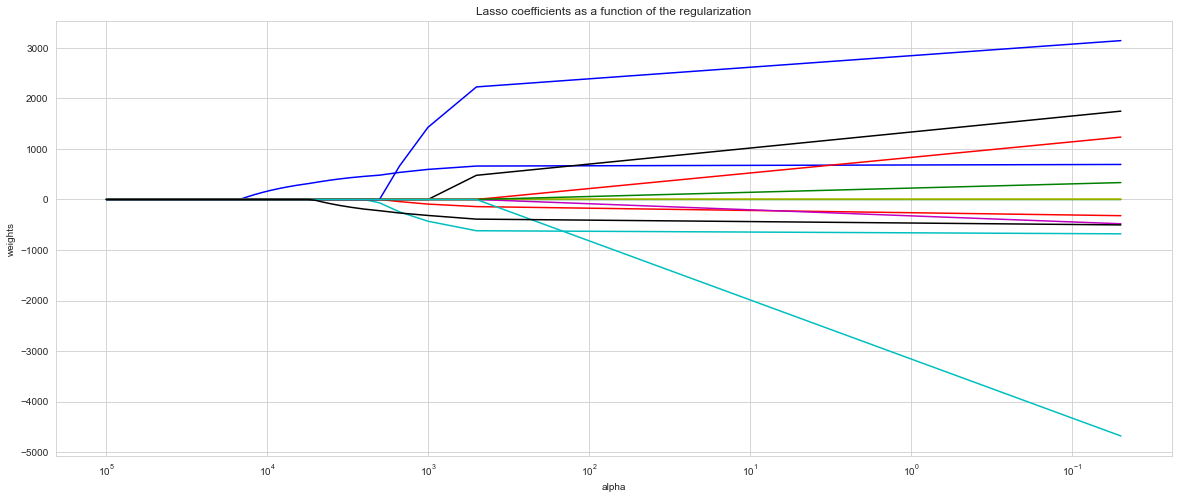

In [158]:
n_alphas = 200
alphas = np.linspace(0.05, 100000, n_alphas)
model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, Y)
    coefs.append(model.coef_)

ax = plt.gca()
ax.set_prop_cycle(cycler("color", ["b", "r", "g", "c", "k", "y", "m"]))

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show();

In [159]:
lasso_cv = LassoCV(alphas = alphas, cv=3, random_state = 42)
lasso_cv.fit(X,Y)

print("lasso_cv.coef_:\n",lasso_cv.coef_)
print("\nlasso_cv.alpha_: ",lasso_cv.alpha_)

print(cross_val_score)
print(cross_val_score(Lasso(lasso_cv.alpha_), X_train, Y_train, cv=5, scoring="neg_mean_squared_error"))
print()
print("mean cross_val_score: {}".format(abs(np.mean(cross_val_score(Lasso(lasso_cv.alpha_), X_train, Y_train, cv=5, scoring="neg_mean_squared_error")))))

lasso_cv.coef_:
 [ 6.93255494e+02 -3.20669489e+02 -3.31155782e-01 -6.79969523e+02
  1.74864273e+03 -1.67451000e-02 -4.80918301e+02  3.14488072e+03
  1.23485069e+03  3.34597935e+02 -4.68147552e+03 -5.03315723e+02]

lasso_cv.alpha_:  0.05
<function cross_val_score at 0x000002EFFF01CF70>
[-1.00676813e+08 -1.11703722e+08 -1.08310539e+08 -1.11755871e+08
 -1.06003909e+08]

mean cross_val_score: 107690170.91658592


Lasso
    r2_score : 0.18585 
    MAE : 8132.73283 
    MSE : 107615572.84815


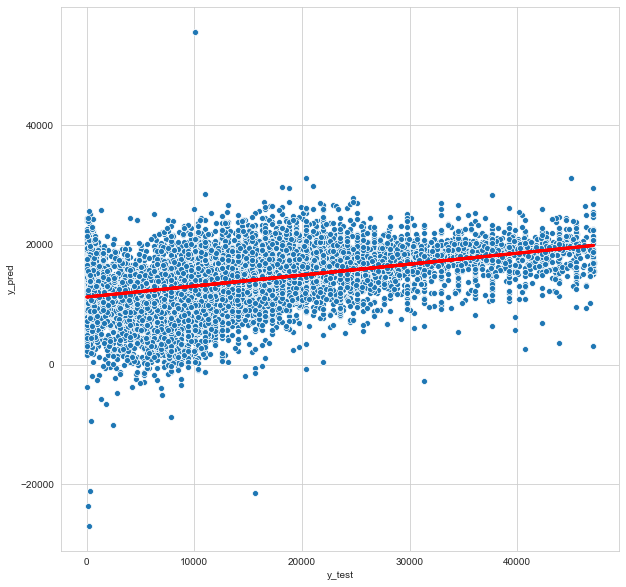

In [160]:
las = Lasso(alpha = lasso_cv.alpha_)
las.fit(X_train_scaled, Y_train)
y_pred = las.predict(X_test_scaled)
print('Lasso\n    r2_score : {:.5f} \n    MAE : {:.5f} \n    MSE : {:.5f}'.format(r2_score(Y_test,y_pred),mean_absolute_error(Y_test,y_pred),mean_squared_error(Y_test,y_pred)))

fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=Y_test,y=y_pred)
plt.xlabel('y_test', fontsize=10)                        
plt.ylabel('y_pred', fontsize=10) 

z=np.polyfit(Y_test,y_pred,1)
p=np.poly1d(z)
plt.plot(Y_test,p(Y_test),c='r',linewidth = 3)

# Ridge

In [161]:
n_alphas = 200
ridge_alphas = np.logspace(0, 10, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, scoring="neg_mean_squared_error", cv=5)
ridge_cv.fit(X, Y)

RidgeCV(alphas=array([1.00000000e+00, 1.12266777e+00, 1.26038293e+00, 1.41499130e+00,
       1.58856513e+00, 1.78343088e+00, 2.00220037e+00, 2.24780583e+00,
       2.52353917e+00, 2.83309610e+00, 3.18062569e+00, 3.57078596e+00,
       4.00880633e+00, 4.50055768e+00, 5.05263107e+00, 5.67242607e+00,
       6.36824994e+00, 7.14942899e+00, 8.02643352e+00, 9.01101825e+00,
       1.01163798e+01, 1.13573336e+0...
       6.98587975e+08, 7.84282206e+08, 8.80488358e+08, 9.88495905e+08,
       1.10975250e+09, 1.24588336e+09, 1.39871310e+09, 1.57029012e+09,
       1.76291412e+09, 1.97916687e+09, 2.22194686e+09, 2.49450814e+09,
       2.80050389e+09, 3.14403547e+09, 3.52970730e+09, 3.96268864e+09,
       4.44878283e+09, 4.99450512e+09, 5.60716994e+09, 6.29498899e+09,
       7.06718127e+09, 7.93409667e+09, 8.90735464e+09, 1.00000000e+10]),
        cv=5, scoring='neg_mean_squared_error')

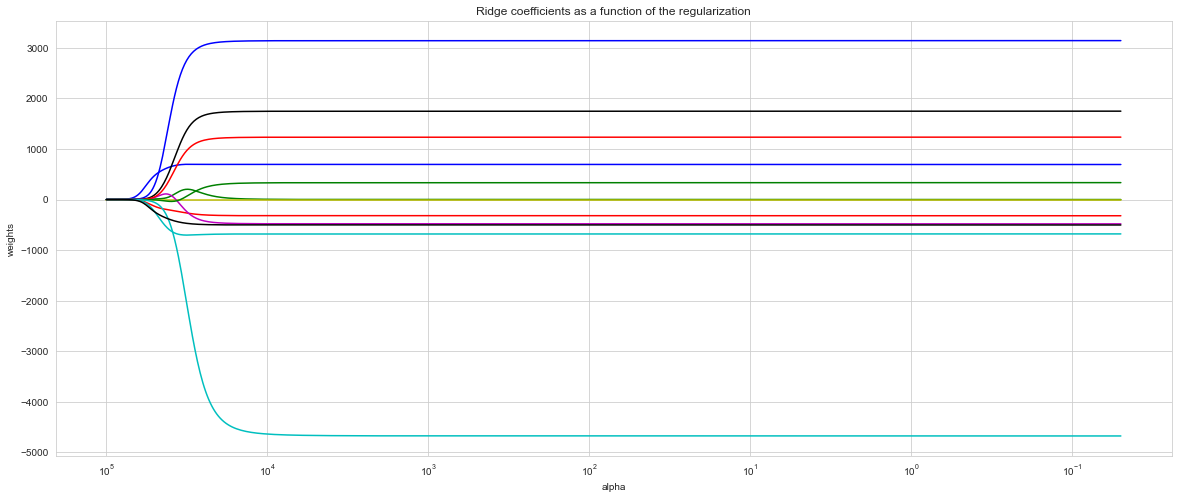

In [162]:
model = Ridge()

coefs = []
for a in ridge_alphas:
    model.set_params(alpha=a)
    model.fit(X, Y)
    coefs.append(model.coef_)

ax = plt.gca()
ax.set_prop_cycle(cycler("color", ["b", "r", "g", "c", "k", "y", "m"]))

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

Ridge
    r2_score : 0.18670 
    MAE : 0.17260 
    MSE : 0.04842


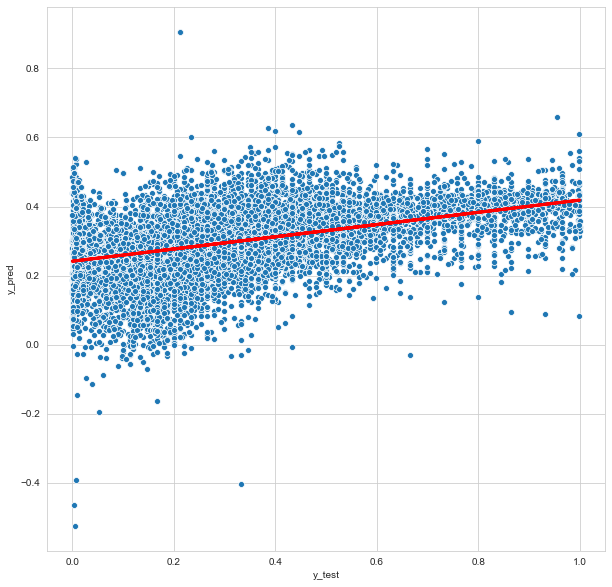

In [38]:
rid = Ridge(alpha=ridge_cv.alpha_)
rid.fit(X_train_scaled, Y_train)
y_pred = rid.predict(X_test_scaled)
print('Ridge\n    r2_score : {:.5f} \n    MAE : {:.5f} \n    MSE : {:.5f}'.format(r2_score(Y_test,y_pred),mean_absolute_error(Y_test,y_pred),mean_squared_error(Y_test,y_pred)))

fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=Y_test,y=y_pred)
plt.xlabel('y_test', fontsize=10)                        
plt.ylabel('y_pred', fontsize=10) 

z=np.polyfit(Y_test,y_pred,1)
p=np.poly1d(z)
plt.plot(Y_test,p(Y_test),c='r',linewidth = 3)

In [163]:
n_alphas = 200
EN_alphas = np.logspace(-5, 2, n_alphas)

EM_cv = ElasticNetCV(alphas=EN_alphas, cv=5)
EM_cv.fit(X, Y)

ElasticNetCV(alphas=array([1.00000000e-05, 1.08436597e-05, 1.17584955e-05, 1.27505124e-05,
       1.38262217e-05, 1.49926843e-05, 1.62575567e-05, 1.76291412e-05,
       1.91164408e-05, 2.07292178e-05, 2.24780583e-05, 2.43744415e-05,
       2.64308149e-05, 2.86606762e-05, 3.10786619e-05, 3.37006433e-05,
       3.65438307e-05, 3.96268864e-05, 4.29700470e-05, 4.65952567e-05,
       5.05263107e-05, 5.478901...
       1.55222536e+01, 1.68318035e+01, 1.82518349e+01, 1.97916687e+01,
       2.14614120e+01, 2.32720248e+01, 2.52353917e+01, 2.73644000e+01,
       2.96730241e+01, 3.21764175e+01, 3.48910121e+01, 3.78346262e+01,
       4.10265811e+01, 4.44878283e+01, 4.82410870e+01, 5.23109931e+01,
       5.67242607e+01, 6.15098579e+01, 6.66991966e+01, 7.23263390e+01,
       7.84282206e+01, 8.50448934e+01, 9.22197882e+01, 1.00000000e+02]),
             cv=5)

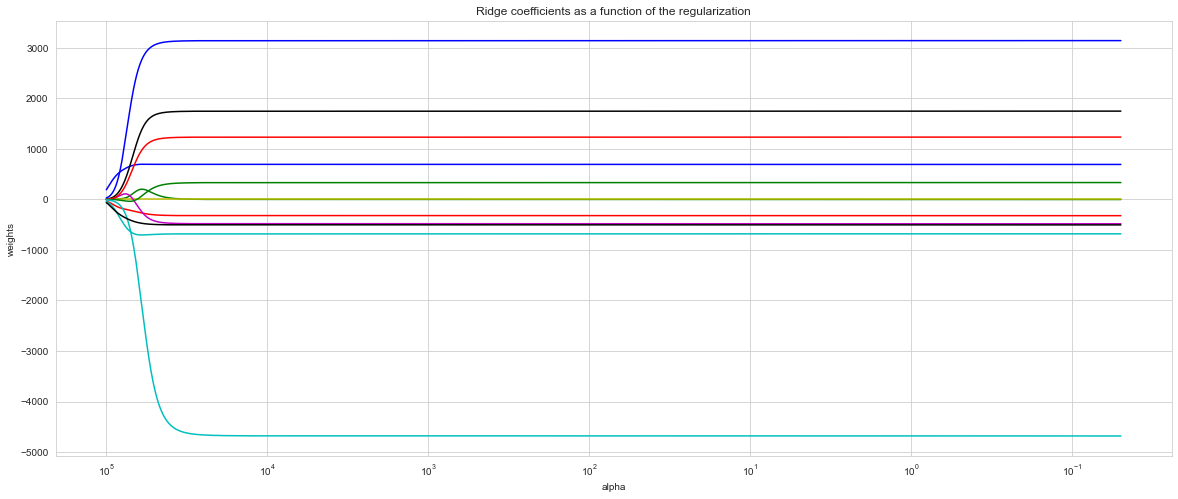

In [164]:
model = ElasticNet()

coefs = []
for a in EN_alphas:
    model.set_params(alpha=a)
    model.fit(X, Y)
    coefs.append(model.coef_)

ax = plt.gca()
ax.set_prop_cycle(cycler("color", ["b", "r", "g", "c", "k", "y", "m"]))

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

ElasticNet
    r2_score : 0.18584 
    MAE : 8132.76312 
    MSE : 107616755.39781


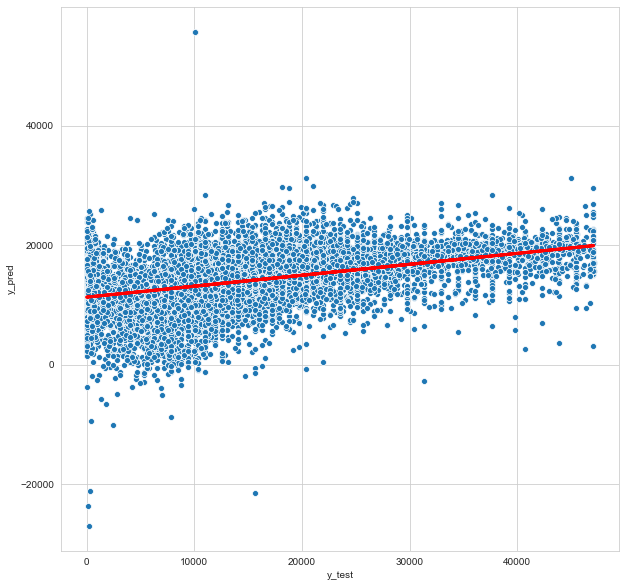

In [122]:
rid = ElasticNet(alpha=EM_cv.alpha_)
rid.fit(X_train, Y_train)
y_pred = rid.predict(X_test)
print('ElasticNet\n    r2_score : {:.5f} \n    MAE : {:.5f} \n    MSE : {:.5f}'.format(r2_score(Y_test,y_pred),mean_absolute_error(Y_test,y_pred),mean_squared_error(Y_test,y_pred)))

fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=Y_test,y=y_pred)
plt.xlabel('y_test', fontsize=10)                        
plt.ylabel('y_pred', fontsize=10) 

z=np.polyfit(Y_test,y_pred,1)
p=np.poly1d(z)
plt.plot(Y_test,p(Y_test),c='r',linewidth = 3)